# results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle
from matplotlib.font_manager import FontProperties  

%matplotlib inline

In [3]:
result_dict = {}
for file in os.listdir(): 
    if file.endswith('90.pkl'):
        with open (f'./{file}','rb') as f:
            con = pickle.load(f)
            result_dict[file[7:-11]] = con

# Deploy Cost

In [8]:
# # 代码中的“...”代表省略的其他参数
# ax = plt.subplot(111)
# # 设置刻度字体大小
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
# # 设置图例字体大小
# ax.legend(..., fontsize=20)


In [203]:
FONTSIZE = 12


# 

In [249]:
#‘serif’, ‘sans-serif’, ‘cursive’, ‘fantasy’, or ‘monospace’
class Yanplotlib():
    def __init__(self,fontsize = 13, font ='serif', weight = 'bold'):
        self.fontsize= fontsize
        self.font = font
        self.weight = weight
        self.font_dict = {'family' : self.font,
        'weight' : self.weight,
        'size' : self.fontsize}
        self.ticks_font = matplotlib.font_manager.FontProperties(family=self.font, size=fontsize, weight=weight)
        
    def after_plot(self,**kw_args):
        #设置坐标刻度值的大小以及刻度值的字体
        plt.tick_params(labelsize=self.fontsize)
        labels = self.ax.get_xticklabels() + self.ax.get_yticklabels()
        [label.set_fontname(self.font) for label in labels]
        [label.set_fontproperties(self.ticks_font)  for label in labels]
        try:
            xticks_val = kw_args['xticks_val']
            xticks_label = kw_args['xticks_label']
            plt.xticks(xticks_val,xticks_label)
        except:
            plt.xticks()
        try:            
            yticks_val = kw_args['yticks_val']
            yticks_label = kw_args['yticks_label']
            plt.xticks(yticks_val,yticks_label)
        except:
            plt.yticks()
            
        xlabel =  kw_args['xlabel']
        ylabel =  kw_args['ylabel']
        try:
            title =  kw_args['title']
            plt.title(title,fontdict=self.font_dict)
        except:
            plt.title(fontdict=self.font_dict)
        name = kw_args['name']
        self.ax.set_xlabel(xlabel,self.font_dict)
        self.ax.set_ylabel(ylabel, self.font_dict)
        plt.legend(prop=self.font_dict)
        plt.show()
        plt.savefig(name)
        
    def before_plot(self,figsize = (4,5)):
        self.fig, self.ax = plt.subplots(figsize=figsize)
        
    def set_fontsize(self,size):
        self.fontsize = size



        

In [250]:
yan = Yanplotlib()


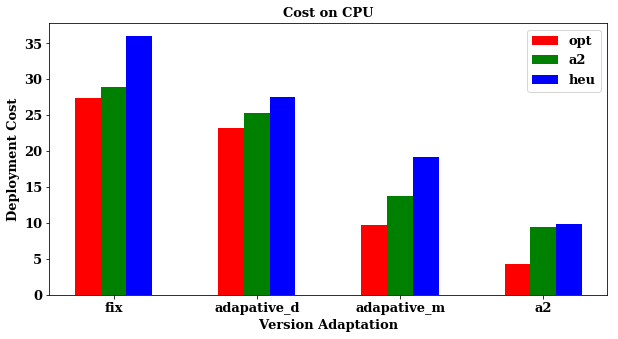

<Figure size 432x288 with 0 Axes>

In [251]:
cost_opt_lst = []
cost_a2_lst = []
cost_heu_lst = []

for key, item in result_dict.items():
    cost_a2_lst.append(item['cost'])
    cost_opt_lst.append(item['cost_opt'])
    cost_heu_lst.append(item['cost_heu'])
cost = [cost_opt_lst,cost_a2_lst,cost_heu_lst]
label = ['opt','a2','heu']
lw = 4
bar_width = 0.3
colors = ['r','g','b']
ticks_val = np.linspace(0,5,4)

yan.before_plot((10,5))
for index,val in enumerate(label):
    plt.bar(ticks_val+index*bar_width,cost[index],width=bar_width,color=colors[index],label=label[index])

kw_args = {'xticks_val':ticks_val+bar_width,
                'xticks_label':list(result_dict.keys()),
                'xlabel':'Version Adaptation',
                'ylabel':'Deployment Cost',
                'name':'cost.pdf',
                'title':'Cost on CPU'
          }
yan.after_plot(**kw_args)

In [16]:
for key, item in result_dict .items():
    print(key,item['avg_bw'])


a2 49.044323756131746
heu 58.745269796776455
adapative_m 92.0
fix 92.0
adapative_d 77.42992291520673


# avg latency  with time

In [23]:
# time_lst = []
# latency_lst = []
# req_lst = []
# req_dict = {}
# history_dict = {}
# latency_dict = {}
# time_dict = {}
# config_dict = {}

for key, item in result_dict.items():
    history_dict[key] = item['history']

for key in result_dict.keys():
    req_lst = [i['requests'] for i in history_dict[key]]
    req_dict[key] = req_lst
    config_dict[key] =  [list(i.values())[0] for i in list(req_dict[key])]
    latency_dict[key] =  [i for i in config_dict[key]]


    
    
print(latency_dict['a2'])

[{'real_latency': 1.193387614999665, 'url': 'http://52.63.190.63:8502/v1/models/res18_dcp_2:classify', 'model_ver': 2, 'data_ver': 10, 'time': '13:6:56', 'batch': 1}, {'real_latency': 1.8472319670036086, 'url': 'http://52.63.190.63:8500/v1/models/res18_dcp_0:classify', 'model_ver': 0, 'data_ver': 0, 'time': '13:6:56', 'batch': 1}, {'real_latency': 2.0376623189949896, 'url': 'http://52.63.190.63:8500/v1/models/res18_dcp_0:classify', 'model_ver': 0, 'data_ver': 2, 'time': '13:6:56', 'batch': 1}, {'real_latency': 0.0012264590004633646, 'url': 'http://52.63.190.63:8505/v1/models/mobile_dcp_2:classify', 'model_ver': 2, 'data_ver': 6, 'time': '13:6:56', 'batch': 1}, {'real_latency': 0.001095999003155157, 'url': 'http://52.63.190.63:8504/v1/models/mobile_dcp_1:classify', 'model_ver': 1, 'data_ver': 1, 'time': '13:6:56', 'batch': 1}, {'real_latency': 0.9995180050027557, 'url': 'http://52.63.190.63:8501/v1/models/res18_dcp_1:classify', 'model_ver': 1, 'data_ver': 6, 'time': '13:6:56', 'batch': 

In [ ]:
s_list

In [74]:
data = {}
for file in os.listdir(): 
    if file.endswith('npy'):
        data[file[:6]]=np.load(file)
print(np.array(data.values())

SyntaxError: unexpected EOF while parsing (<ipython-input-74-ad31499351d4>, line 5)

In [58]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()           # Get locations and labels
    
        xticks(ticks, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` a

In [11]:
history

result_dict = {}
for file in os.listdir(): 
    if file.endswith('90.pkl'):
        with open (f'./{file}','rb') as f:
            print(file)
            con = pickle.load(f)
            print(file[7:-11])
            result_dict[file[7:-11]] = con
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inlines
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inlines
FONTSIZE = 13
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline
FONTSIZE = 13
result_dict = {}
for file in os.listdir(): 
    if file.endswith('90.pkl'):
        with open (f'./{file}','rb') as f:
            print(file)
            con = pickle.load(f)
            print(file[7:-11])
            result_dict[file[7:-11]] = con
# # 代码中的“...”代表省略的其他参数
# ax = plt.subplot(111)
# # 设置刻度字体大小
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsi

In [55]:
def print_kwargs(**kw_args):
	print(kw_args['a'])

a = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
print_kwargs(**a) 

1


In [198]:
help(ax.get_xticklabels().set_fontproperties())

AttributeError: 'silent_list' object has no attribute 'set_fontproperties'